In [3]:
import seaborn as sns
%matplotlib inline

import pandas as pd

### Questoion and problem Definition

first you should examine the dataset and gather some information about it. 
it'll be your prior knowladge about the data you are going to explore

### Loading the Dataset

In [5]:
sns.set_theme(
    style='whitegrid',
    font_scale=1.2,
    # rc=custom_rcparams,
)

In [6]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> let's fix column 'species' and change it's Dtype to categorical

In [13]:
df['species'] = df['species'].astype('category')
df['species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

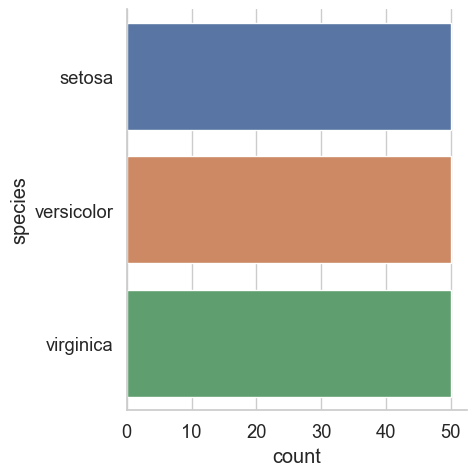

In [14]:
sns.catplot(
    data=df,
    y='species',
    kind='count',
)

In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Analyze by Bisualizing Data

> perfect, now let's examine the data, as far as it is small dataset, you can do this on all elements :

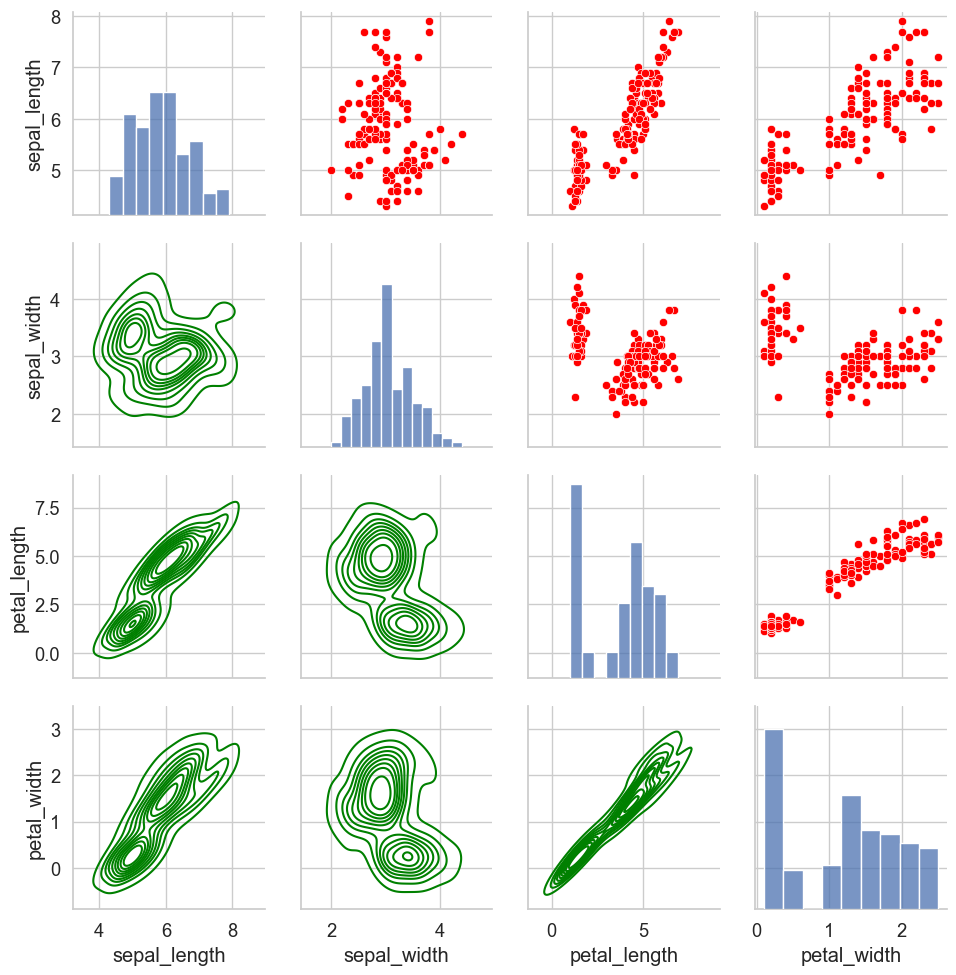

In [28]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot, color='red')
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot, color='green',)

as you can see, the seaborn doesnt draw the 'species' column here, so you can give it as a `hue` parameter

if your data is too big, you can use a `sample` of data to plot :

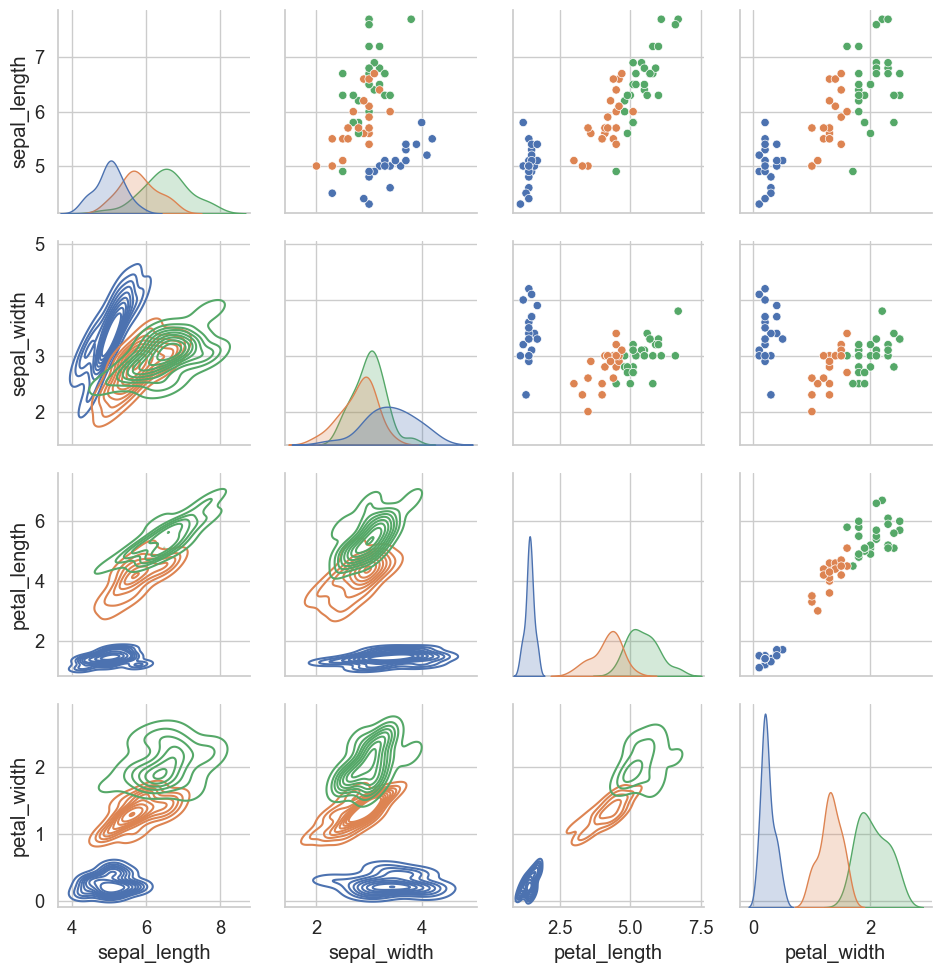

In [36]:
sample_df = df.sample(70) 

g = sns.PairGrid(sample_df, hue='species')
g.map_upper(sns.scatterplot, color='red')
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.kdeplot, color='green',)

#### **Correlation Hitmap**

<AxesSubplot:>

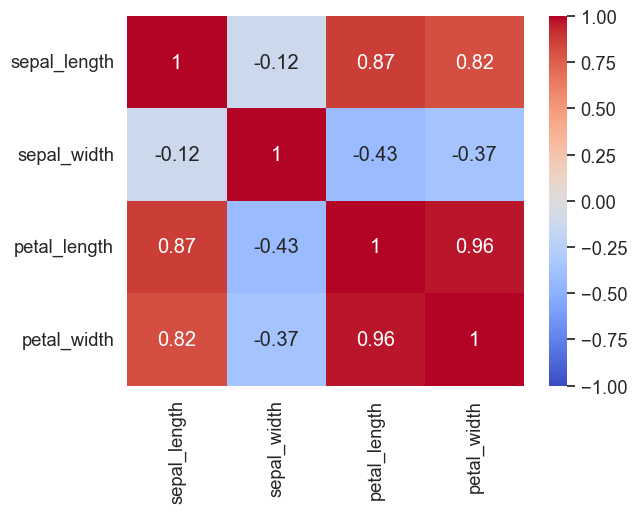

In [42]:
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
)

you can draw better plot with a few customizations :

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def corr_plot(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 4))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1, vmin=-1,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5},
        annot=True,
    )
    
    return ax

<AxesSubplot:>

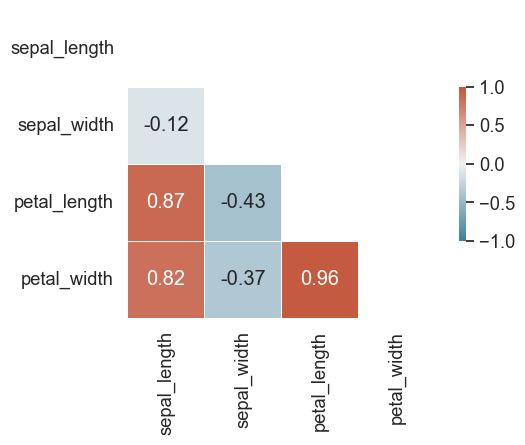

In [51]:
corr_plot(df)

### Pandas Profiling 

In [ ]:
!conda install pandas-profiling -y

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_file("iris_report.html")
profile.to_file("iris_report.json")